In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv("netflix.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.shape

(8807, 12)

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.show_id.nunique()

8807

In [16]:
df.type.value_counts()/len(df)*100

type
Movie      69.615079
TV Show    30.384921
Name: count, dtype: float64

70% are movies and 30% are TV shows

In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [20]:
np.round(df.isnull().sum()/len(df)*100,2)

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

In [13]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [14]:
df.rating.value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [17]:
df.country.value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [18]:
df.country.nunique()

748

In [21]:
df[df['rating']== '74 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."


In [22]:
# Split the 'country' column by commas
df['country'] = df['country'].str.split(', ')

# Un-nest (explode) the 'country' column
df = df.explode('country').reset_index(drop=True)


In [23]:
df.country.value_counts()

country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: count, Length: 127, dtype: int64

In [24]:
df.country.nunique()

127

In [26]:
df.shape

(10845, 12)

In [27]:
df['listed_in'].value_counts() 

listed_in
Dramas, International Movies                              485
Documentaries                                             423
Dramas, Independent Movies, International Movies          393
Stand-Up Comedy                                           335
Comedies, Dramas, International Movies                    314
                                                         ... 
Crime TV Shows, TV Comedies, Teen TV Shows                  1
TV Comedies, TV Dramas, TV Mysteries                        1
Reality TV, Science & Nature TV, TV Action & Adventure      1
International TV Shows, Korean TV Shows, TV Horror          1
Cult Movies, Dramas, Thrillers                              1
Name: count, Length: 514, dtype: int64

In [28]:
df['listed_in'].nunique()

514

In [29]:
# Split the 'listed_in' column by commas
df['listed_in'] = df['listed_in'].str.split(', ')

# Un-nest (explode) the 'listed_in' column
df = df.explode('listed_in').reset_index(drop=True)

In [30]:
df['listed_in'].value_counts()

listed_in
International Movies            3509
Dramas                          3199
Comedies                        1981
International TV Shows          1465
Action & Adventure              1182
Documentaries                   1116
Independent Movies              1040
TV Dramas                        852
Children & Family Movies         845
Thrillers                        806
Romantic Movies                  722
TV Comedies                      630
Kids' TV                         596
Crime TV Shows                   541
Horror Movies                    458
Docuseries                       436
Music & Musicals                 429
Romantic TV Shows                384
Sci-Fi & Fantasy                 380
Stand-Up Comedy                  344
British TV Shows                 306
Reality TV                       270
Sports Movies                    265
TV Action & Adventure            204
Spanish-Language TV Shows        202
Anime Series                     192
Korean TV Shows             

In [31]:
df['listed_in'].nunique()

42

In [32]:
df.shape

(23754, 12)

In [34]:
df.isnull().sum()

show_id            0
type               0
title              0
director        6567
cast            1845
country         1722
date_added        20
release_year       0
rating             6
duration           3
listed_in          0
description        0
dtype: int64

In [35]:
columns_to_replace = ['director', 'cast', 'country']

# Loop through each column and replace NaN values
for column in columns_to_replace:
    df[column] = df[column].fillna(f'unknown_{column}')

In [36]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      20
release_year     0
rating           6
duration         3
listed_in        0
description      0
dtype: int64

In [39]:
df.dropna(inplace=True)

In [40]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [41]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown_country,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
...,...,...,...,...,...,...,...,...,...,...,...,...
23749,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."
23750,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero..."
23751,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
23752,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [42]:
# Split the 'cast' column by commas
df['cast'] = df['cast'].str.split(', ')

# Un-nest (explode) the 'cast' column
df = df.explode('cast').reset_index(drop=True)

In [43]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,unknown_director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
186092,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
186093,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
186094,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
186095,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186097 entries, 0 to 186096
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       186097 non-null  object
 1   type          186097 non-null  object
 2   title         186097 non-null  object
 3   director      186097 non-null  object
 4   cast          186097 non-null  object
 5   country       186097 non-null  object
 6   date_added    186097 non-null  object
 7   release_year  186097 non-null  int64 
 8   rating        186097 non-null  object
 9   duration      186097 non-null  object
 10  listed_in     186097 non-null  object
 11  description   186097 non-null  object
dtypes: int64(1), object(11)
memory usage: 17.0+ MB


In [45]:
df.type.value_counts()

type
Movie      131845
TV Show     54252
Name: count, dtype: int64

In [46]:
df.type.value_counts()/len(df)*100

type
Movie      70.847461
TV Show    29.152539
Name: count, dtype: float64

70% Movies and TV Shows are there in the platform

In [47]:
df.director.value_counts()

director
unknown_director            50425
Martin Scorsese               419
Youssef Chahine               409
Cathy Garcia-Molina           356
Steven Spielberg              355
                            ...  
John Hoffman, Nanfu Wang        1
Jon Manning                     1
Alexandra Dean                  1
Halder Gomes                    1
Kirsten Johnson                 1
Name: count, Length: 4527, dtype: int64

In [48]:
import seaborn as sns

<Axes: xlabel='type', ylabel='count'>

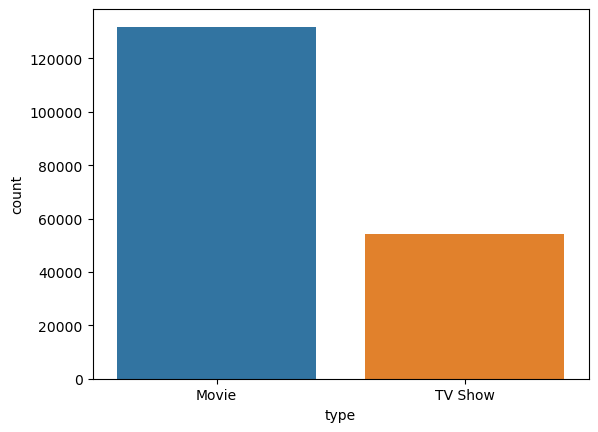

In [49]:
sns.countplot(x= df['type'])

In [51]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [52]:
df.country.value_counts()

country
United States      54132
India              21147
United Kingdom     12377
unknown_country    11142
Japan               7860
                   ...  
Uganda                 1
Nicaragua              1
Botswana               1
United States,         1
Kazakhstan             1
Name: count, Length: 128, dtype: int64

In [53]:
df.rating.value_counts()

rating
TV-MA       67596
TV-14       41956
R           23990
PG-13       15233
TV-PG       13765
PG           9011
TV-Y7        5782
TV-Y         3151
TV-G         2650
NR           1491
G            1151
NC-17         149
TV-Y7-FV       86
UR             86
Name: count, dtype: int64

In [55]:
df.groupby('type')['rating'].value_counts()

type     rating  
Movie    TV-MA       39246
         TV-14       27429
         R           23936
         PG-13       15233
         TV-PG        9221
         PG           9011
         TV-Y7        1974
         TV-G         1609
         TV-Y         1372
         NR           1366
         G            1151
         NC-17         149
         UR             86
         TV-Y7-FV       62
TV Show  TV-MA       28350
         TV-14       14527
         TV-PG        4544
         TV-Y7        3808
         TV-Y         1779
         TV-G         1041
         NR            125
         R              54
         TV-Y7-FV       24
Name: count, dtype: int64

In [57]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [64]:
# Define the mapping for ratings to numeric values
rating_mapping = {
    'G': 1, 'TV-Y': 1, 'TV-G': 1,
    'PG': 2, 'TV-Y7': 2, 'TV-Y7-FV': 2.5,
    'PG-13': 3, 'TV-PG': 3,
    'TV-14': 4, 'R': 5, 'TV-MA': 5,
    'NC-17': 6, 'NR': 0, 'UR': 0
}

# Apply the mapping
df['rating_numeric'] = df['rating'].map(rating_mapping)

Assigning numeric values based on the level of content restriction. Higher values indicate more restricted content, while lower values represent general or unrestricted content.

In [65]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_numeric
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",3.0
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",5.0
2,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",5.0
3,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",5.0
4,s2,TV Show,Blood & Water,unknown_director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186092,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0
186093,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0
186094,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0
186095,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0


<Axes: xlabel='rating', ylabel='count'>

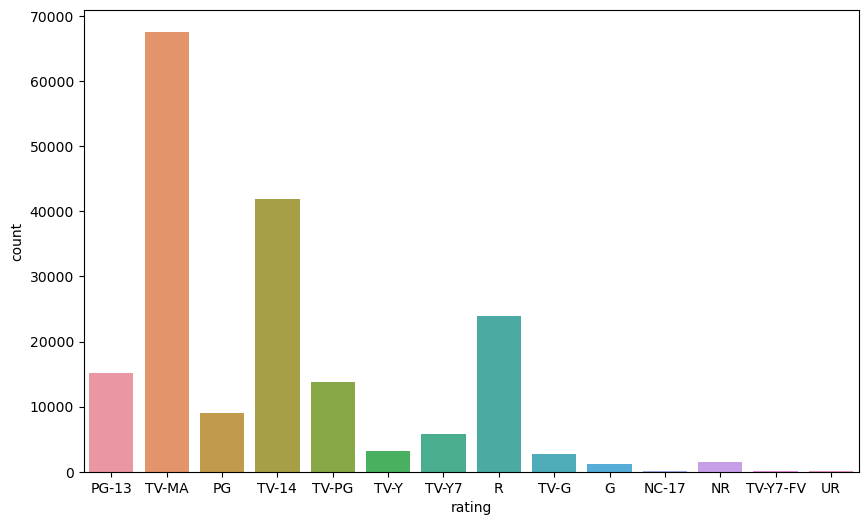

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(x=df['rating'])

<Axes: xlabel='rating_numeric', ylabel='count'>

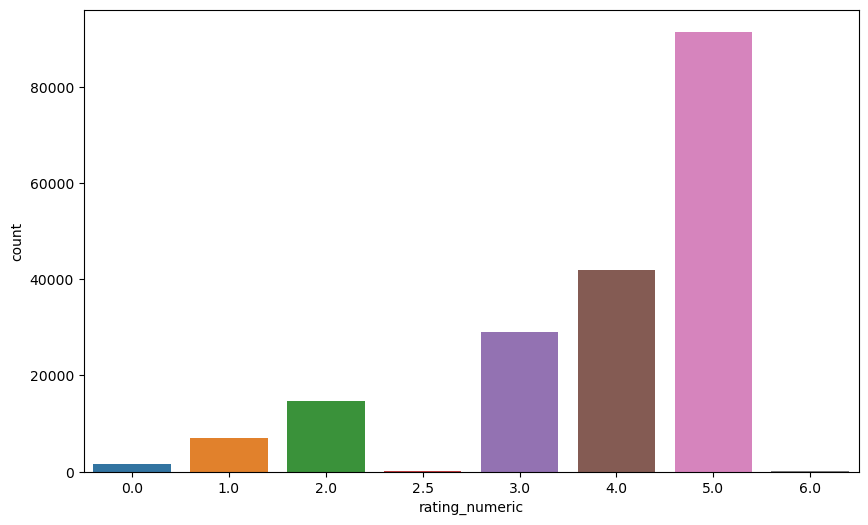

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(x=df['rating_numeric'])

In [66]:
df['country'].nunique()

128

<Axes: xlabel='country', ylabel='count'>

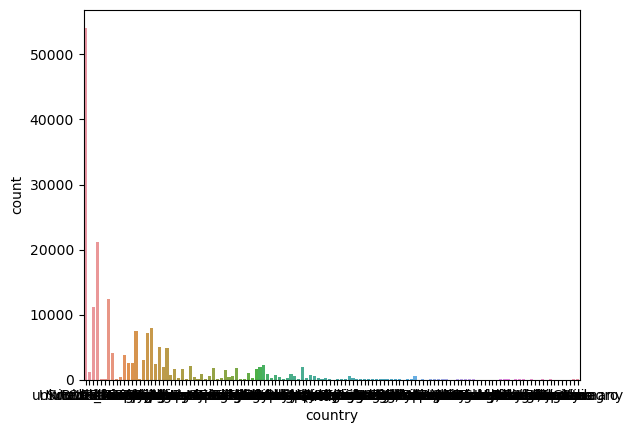

In [67]:
sns.countplot(x=df.country)

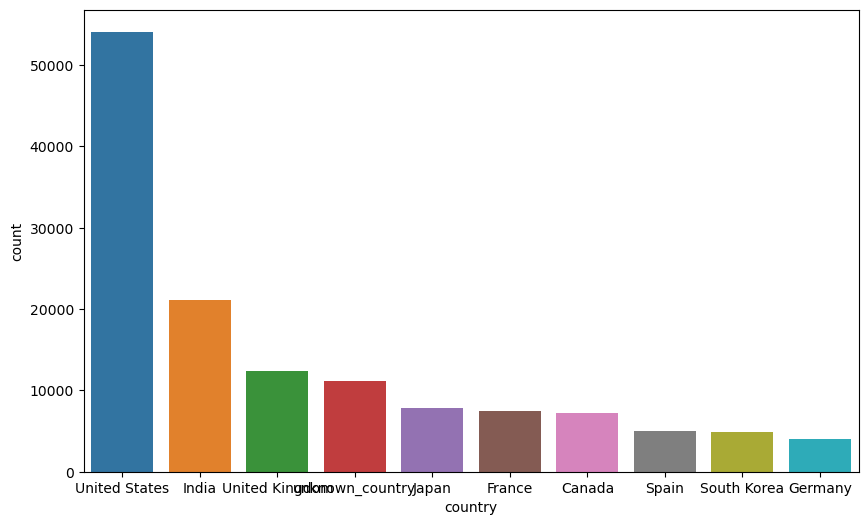

In [68]:
# Get the top 10 countries by frequency
top_10_countries = df['country'].value_counts().nlargest(10).index

# Filter the DataFrame to only include the top 10 countries
df_top_10 = df[df['country'].isin(top_10_countries)]

# Plot the countplot for the top 10 countries
plt.figure(figsize=(10, 6))  # Optional: Set figure size
sns.countplot(x=df_top_10['country'], order=top_10_countries)
plt.show()

In [72]:
df.type.value_counts()

type
Movie      131845
TV Show     54252
Name: count, dtype: int64

In [70]:
df_movie= df[df['type']=='Movie']

In [71]:
df_movie.shape

(131845, 13)

In [73]:
df_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_numeric
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",3.0
159,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Vanessa Hudgens,unknown_country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2.0
160,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Kimiko Glenn,unknown_country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2.0
161,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",James Marsden,unknown_country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2.0
162,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Sofia Carson,unknown_country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186092,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0
186093,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0
186094,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0
186095,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0


In [74]:
movies_per_country = df_movie.groupby('country')['title'].nunique()

In [75]:
top_10_countries= movies_per_country.nlargest(10)

In [76]:
top_10_countries

country
United States      2748
India               962
United Kingdom      532
unknown_country     439
Canada              319
France              303
Germany             182
Spain               171
Japan               119
China               114
Name: title, dtype: int64

In [77]:
df_tv= df[df['type']=='TV Show']

In [79]:
df_tv.shape

(54252, 13)

In [80]:
tvs_per_country = df_tv.groupby('country')['title'].nunique()

In [81]:
top_10_countries_tvs= tvs_per_country.nlargest(10)

In [82]:
top_10_countries_tvs

country
United States      932
unknown_country    390
United Kingdom     271
Japan              197
South Korea        170
Canada             126
France              90
India               84
Taiwan              70
Australia           64
Name: title, dtype: int64

<Axes: xlabel='country', ylabel='title'>

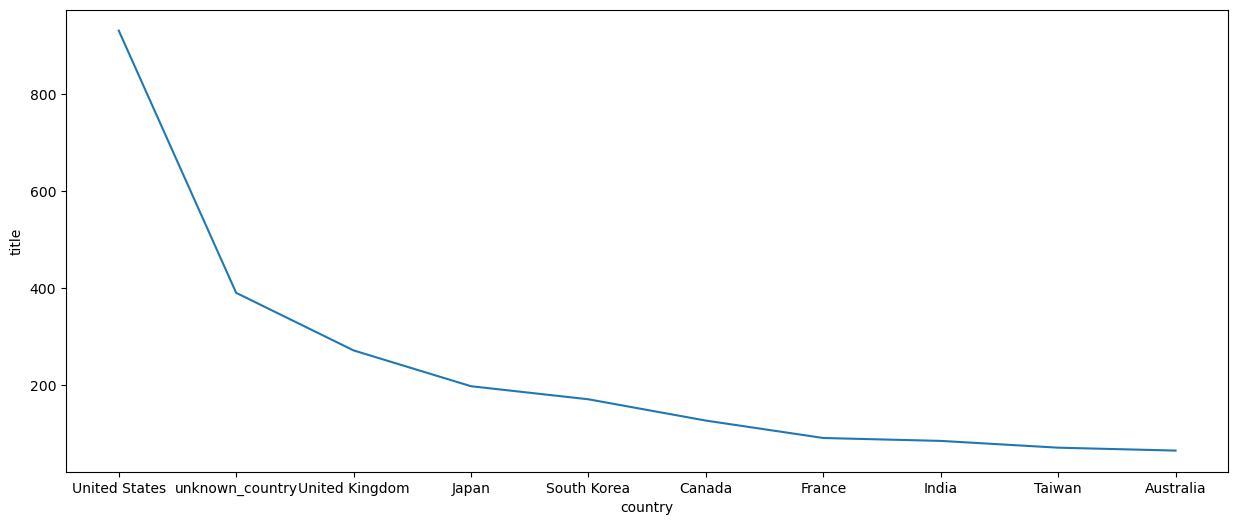

In [91]:
plt.figure(figsize=(15, 6))
sns.lineplot(top_10_countries_tvs)

In [92]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_numeric
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",3.0
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",5.0
2,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",5.0
3,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",5.0
4,s2,TV Show,Blood & Water,unknown_director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186092,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0
186093,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0
186094,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0
186095,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0


In [97]:
pip install python-dateutil


Note: you may need to restart the kernel to use updated packages.


In [98]:

from dateutil import parser


# Convert the date string to datetime format using dateutil.parser
df['date_added'] = df['date_added'].apply(parser.parse)

# Extract the week number and month
df['week_number'] = df['date_added'].dt.isocalendar().week
df['month'] = df['date_added'].dt.month

In [99]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_numeric,week_number,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",3.0,38,9
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",5.0,38,9
2,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",5.0,38,9
3,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",5.0,38,9
4,s2,TV Show,Blood & Water,unknown_director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",5.0,38,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186092,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0,9,3
186093,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0,9,3
186094,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0,9,3
186095,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0,9,3


In [100]:
df_movie= df[df['type']== 'Movie']

In [101]:
df_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_numeric,week_number,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",3.0,38,9
159,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Vanessa Hudgens,unknown_country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2.0,38,9
160,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Kimiko Glenn,unknown_country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2.0,38,9
161,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",James Marsden,unknown_country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2.0,38,9
162,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Sofia Carson,unknown_country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2.0,38,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186092,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0,9,3
186093,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0,9,3
186094,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0,9,3
186095,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0,9,3


In [102]:
df_show= df[df['type']== 'TV Show']

In [103]:
df_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_numeric,week_number,month
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",5.0,38,9
2,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",5.0,38,9
3,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",5.0,38,9
4,s2,TV Show,Blood & Water,unknown_director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",5.0,38,9
5,s2,TV Show,Blood & Water,unknown_director,Dillon Windvogel,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",5.0,38,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185970,s8801,TV Show,Zindagi Gulzar Hai,unknown_director,Javed Sheikh,Pakistan,2016-12-15,2012,TV-PG,1 Season,TV Dramas,"Strong-willed, middle-class Kashaf and carefre...",3.0,50,12
185971,s8801,TV Show,Zindagi Gulzar Hai,unknown_director,Hina Khawaja Bayat,Pakistan,2016-12-15,2012,TV-PG,1 Season,TV Dramas,"Strong-willed, middle-class Kashaf and carefre...",3.0,50,12
186038,s8804,TV Show,Zombie Dumb,unknown_director,unknown_cast,unknown_country,2019-07-01,2018,TV-Y7,2 Seasons,Kids' TV,"While living alone in a spooky town, a young g...",2.0,27,7
186039,s8804,TV Show,Zombie Dumb,unknown_director,unknown_cast,unknown_country,2019-07-01,2018,TV-Y7,2 Seasons,Korean TV Shows,"While living alone in a spooky town, a young g...",2.0,27,7


In [104]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'rating_numeric', 'week_number', 'month'],
      dtype='object')

In [107]:
tv_shows_per_week = df_show.groupby('week_number')['title'].count()
tv_shows_per_week.idxmax()

27

In [108]:
movies_per_week = df_movie.groupby('week_number')['title'].count()
movies_per_week.idxmax()

1

In [109]:
movies_per_week

week_number
1     7838
2     1481
3     1840
4      908
5     2868
6     1471
7     2320
8     1455
9     4664
10    2351
11    2161
12    1340
13    3289
14    2491
15    2297
16    2142
17    2339
18    3203
19    1520
20    1711
21    1518
22    3151
23    2903
24    1645
25    2190
26    4457
27    3397
28    1982
29    1969
30    3025
31    3891
32    1204
33    2236
34    2253
35    4589
36    2303
37    2365
38    1894
39    2465
40    4573
41    1772
42    1944
43    2293
44    5275
45    1255
46    1396
47    1661
48    3394
49    2028
50    2256
51    1892
52    1599
53    1381
Name: title, dtype: int64

In [110]:
tv_shows_per_week

week_number
1     1018
2      812
3      590
4      788
5     1344
6      611
7      839
8      976
9      784
10     719
11     927
12    1000
13    1554
14     828
15    1137
16     549
17     864
18    1334
19     866
20     939
21     997
22    1150
23     960
24    1702
25     703
26    1530
27    1977
28     586
29     797
30     725
31    1461
32     968
33    1006
34     831
35    1942
36     879
37    1127
38    1086
39     743
40    1362
41     764
42     900
43     564
44    1347
45     855
46    1154
47     678
48    1469
49    1006
50    1182
51    1121
52    1130
53    1071
Name: title, dtype: int64

In [113]:
df['listed_in'].nunique()

42

In [120]:
movies_per_cast = df_movie.groupby('cast')['title'].nunique()

In [121]:
top_10_cast= movies_per_cast.nlargest(10)

In [122]:
top_10_cast

cast
unknown_cast        475
Anupam Kher          42
Shah Rukh Khan       35
Naseeruddin Shah     32
Akshay Kumar         30
Om Puri              30
Amitabh Bachchan     28
Julie Tejwani        28
Paresh Rawal         28
Boman Irani          27
Name: title, dtype: int64

In [124]:
df_show['type'].unique()

array(['TV Show'], dtype=object)

In [125]:
tvs_per_cast = df_show.groupby('cast')['title'].nunique()

In [126]:
top_10_cast_tvs= tvs_per_cast.nlargest(10)

In [127]:
top_10_cast_tvs

cast
unknown_cast          350
Takahiro Sakurai       25
Yuki Kaji              19
Daisuke Ono            17
Junichi Suwabe         17
Ai Kayano              16
Yuichi Nakamura        16
Jun Fukuyama           15
Yoshimasa Hosoya       15
David Attenborough     14
Name: title, dtype: int64

In [130]:
movies_per_director = df_movie.groupby('director')['title'].nunique()

In [131]:
top_10_director= movies_per_director.nlargest(10)

In [132]:
top_10_director

director
unknown_director          187
Rajiv Chilaka              19
Raúl Campos, Jan Suter     18
Suhas Kadav                16
Marcus Raboy               15
Jay Karas                  14
Cathy Garcia-Molina        13
Jay Chapman                12
Martin Scorsese            12
Youssef Chahine            12
Name: title, dtype: int64

In [136]:
tvs_per_director = df_show.groupby('director')['title'].nunique()

In [137]:
top_10_director_tvs= tvs_per_director.nlargest(10)

In [138]:
top_10_director_tvs

director
unknown_director             2434
Alastair Fothergill             3
Hsu Fu-chun                     2
Iginio Straffi                  2
Ken Burns                       2
Rob Seidenglanz                 2
Shin Won-ho                     2
Stan Lathan                     2
Adrien Lagier, Ousmane Ly       1
Adrián García Bogliano          1
Name: title, dtype: int64

In [141]:
df_movie.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'rating_numeric', 'week_number', 'month'],
      dtype='object')

In [144]:
from wordcloud import WordCloud
all_genres = ' '.join(df_movie['listed_in'])

In [143]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


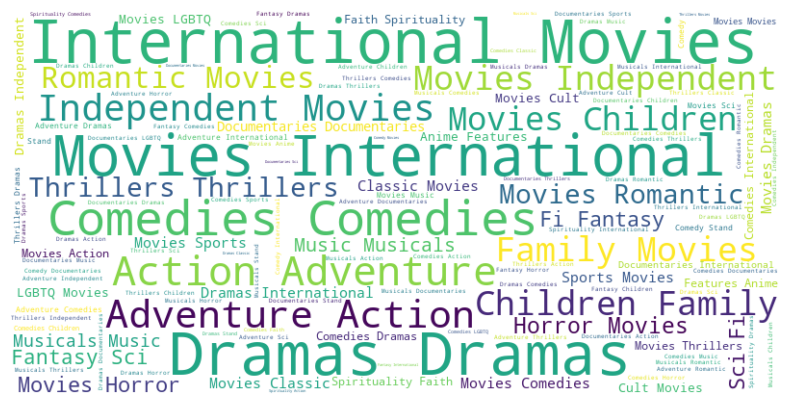

In [145]:
 #Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()

In [148]:
# Convert release_year to datetime format (setting the date to January 1st of that year)
df_movie['release_year'] = pd.to_datetime(df_movie['release_year'], format='%Y')

# Calculate the difference between date_added and release_year
df_movie['years_diff'] = np.round((df_movie['date_added'] - df_movie['release_year']).dt.days / 365.25,2)  # Converting to years


/var/folders/v5/5r93hk2j2fb9b_z1l0hdmg_h0000gn/T/ipykernel_80780/1160672620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['release_year'] = pd.to_datetime(df_movie['release_year'], format='%Y')
/var/folders/v5/5r93hk2j2fb9b_z1l0hdmg_h0000gn/T/ipykernel_80780/1160672620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['years_diff'] = np.round((df_movie['date_added'] - df_movie['release_year']).dt.days / 365.25,2)  # Converting to years


In [149]:
df_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_numeric,week_number,month,years_diff
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",3.0,38,9,1.73
159,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Vanessa Hudgens,unknown_country,2021-09-24,2021-01-01,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2.0,38,9,0.73
160,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Kimiko Glenn,unknown_country,2021-09-24,2021-01-01,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2.0,38,9,0.73
161,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",James Marsden,unknown_country,2021-09-24,2021-01-01,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2.0,38,9,0.73
162,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Sofia Carson,unknown_country,2021-09-24,2021-01-01,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2.0,38,9,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186092,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015-01-01,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0,9,3,4.16
186093,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015-01-01,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0,9,3,4.16
186094,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015-01-01,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0,9,3,4.16
186095,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015-01-01,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,4.0,9,3,4.16


<Axes: xlabel='years_diff', ylabel='count'>

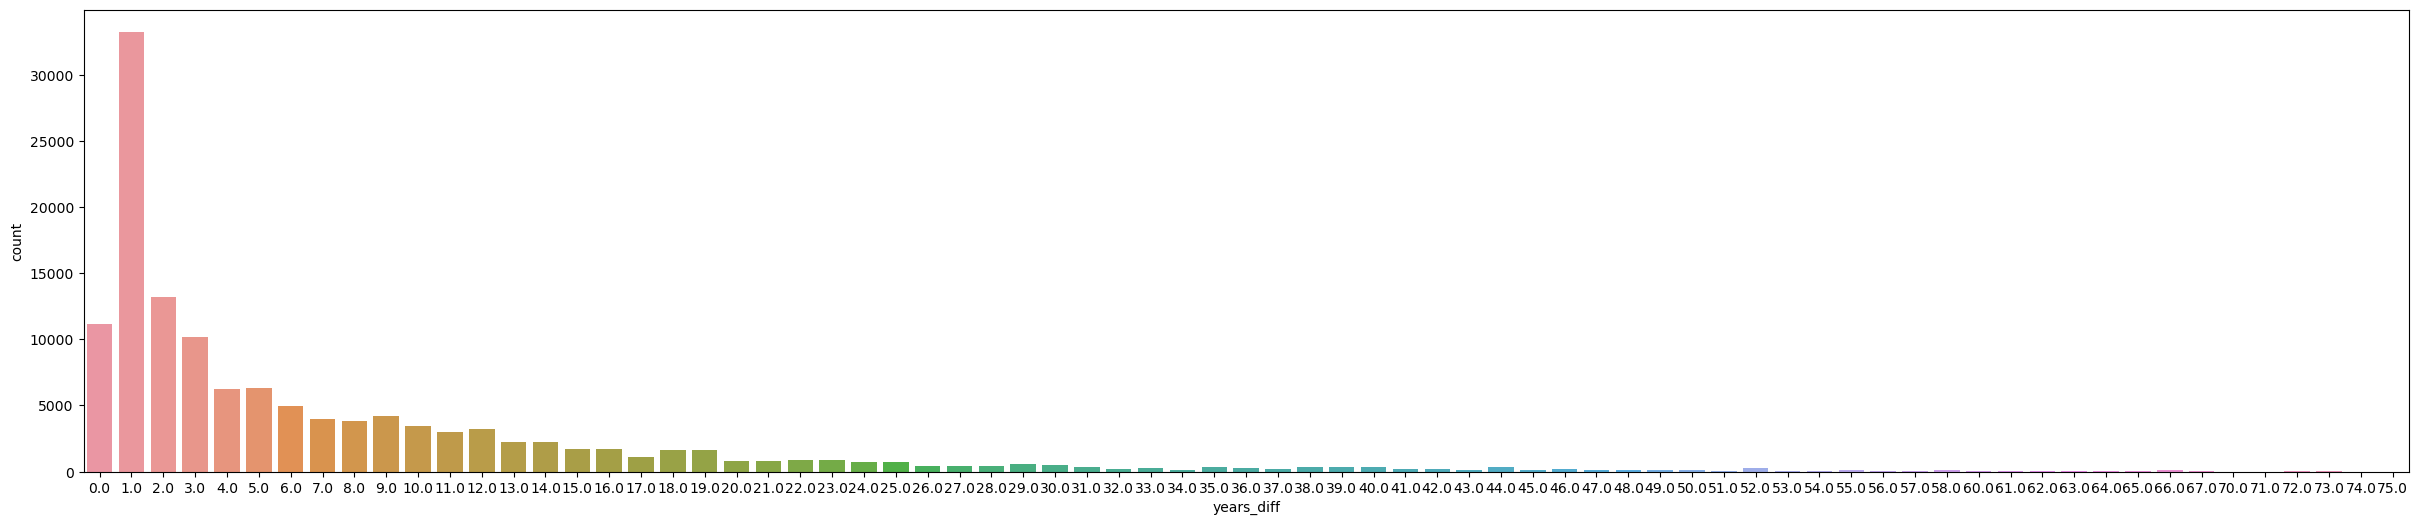

In [155]:
plt.figure(figsize=(30, 6))
sns.countplot(x=np.round(df_movie['years_diff'],0))